# 0.load Moudle

In [1]:
import os
import pickle as pkl
import pandas as pd
from pydeseq2.dds import DeseqDataSet
from pydeseq2.default_inference import DefaultInference
from pydeseq2.ds import DeseqStats
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 1.load data

In [2]:
counts_df = pd.read_csv("/home/lzz/rna/data/merged_genes_results.txt", index_col=0, sep="\t")
counts_df

,counts/per_sample_tran/B21_1.genes.results,counts/per_sample_tran/B21_2.genes.results,counts/per_sample_tran/B21_3.genes.results,counts/per_sample_tran/S21_1.genes.results,counts/per_sample_tran/S21_2.genes.results,counts/per_sample_tran/S21_3.genes.results,counts/per_sample_tran/T21_1.genes.results,counts/per_sample_tran/T21_2.genes.results,counts/per_sample_tran/T21_3.genes.results
ENSMUSG00000000001.4,4786.0,4377.0,3900.0,3830.0,3583.0,4211.0,5457.0,6059.0,4136.0
ENSMUSG00000000003.15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSMUSG00000000028.15,152.0,150.0,138.0,113.0,126.0,132.0,246.0,155.0,134.0
ENSMUSG00000000031.16,78.0,78.0,40.0,10.0,8.0,45.0,206.0,83.0,31.0
ENSMUSG00000000037.17,17.0,9.0,21.0,9.0,4.0,15.0,30.0,14.0,18.0
...,...,...,...,...,...,...,...,...,...
ENSMUSG00000118484.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSMUSG00000118485.1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSMUSG00000118486.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSMUSG00000118487.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
counts_df = counts_df.iloc[:, 0:6]
counts_df

,counts/per_sample_tran/B21_1.genes.results,counts/per_sample_tran/B21_2.genes.results,counts/per_sample_tran/B21_3.genes.results,counts/per_sample_tran/S21_1.genes.results,counts/per_sample_tran/S21_2.genes.results,counts/per_sample_tran/S21_3.genes.results
ENSMUSG00000000001.4,4786.0,4377.0,3900.0,3830.0,3583.0,4211.0
ENSMUSG00000000003.15,0.0,0.0,0.0,0.0,0.0,0.0
ENSMUSG00000000028.15,152.0,150.0,138.0,113.0,126.0,132.0
ENSMUSG00000000031.16,78.0,78.0,40.0,10.0,8.0,45.0
ENSMUSG00000000037.17,17.0,9.0,21.0,9.0,4.0,15.0
...,...,...,...,...,...,...
ENSMUSG00000118484.1,0.0,0.0,0.0,0.0,0.0,0.0
ENSMUSG00000118485.1,1.0,0.0,1.0,0.0,0.0,0.0
ENSMUSG00000118486.1,0.0,0.0,0.0,0.0,0.0,0.0
ENSMUSG00000118487.1,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
counts_df.columns = ["BLM1", "BLM2", "BLM3", "PBS1", "PBS2", "PBS3"]

In [5]:
counts_df = counts_df.T
counts_df

,ENSMUSG00000000001.4,ENSMUSG00000000003.15,ENSMUSG00000000028.15,ENSMUSG00000000031.16,ENSMUSG00000000037.17,ENSMUSG00000000049.11,ENSMUSG00000000056.7,ENSMUSG00000000058.6,ENSMUSG00000000078.7,ENSMUSG00000000085.16,...,ENSMUSG00000118479.1,ENSMUSG00000118480.1,ENSMUSG00000118481.1,ENSMUSG00000118482.1,ENSMUSG00000118483.1,ENSMUSG00000118484.1,ENSMUSG00000118485.1,ENSMUSG00000118486.1,ENSMUSG00000118487.1,ENSMUSG00000118488.1
BLM1,4786.0,0.0,152.0,78.0,17.0,2.0,774.0,8702.0,12842.0,639.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
BLM2,4377.0,0.0,150.0,78.0,9.0,5.0,714.0,6483.0,9858.0,537.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BLM3,3900.0,0.0,138.0,40.0,21.0,8.0,633.0,7476.0,10091.0,609.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
PBS1,3830.0,0.0,113.0,10.0,9.0,7.0,675.0,9421.0,10426.0,710.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PBS2,3583.0,0.0,126.0,8.0,4.0,0.0,594.0,8090.0,7520.0,465.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PBS3,4211.0,0.0,132.0,45.0,15.0,4.0,697.0,9613.0,10970.0,782.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
counts_df=counts_df.astype(int)
counts_df


,ENSMUSG00000000001.4,ENSMUSG00000000003.15,ENSMUSG00000000028.15,ENSMUSG00000000031.16,ENSMUSG00000000037.17,ENSMUSG00000000049.11,ENSMUSG00000000056.7,ENSMUSG00000000058.6,ENSMUSG00000000078.7,ENSMUSG00000000085.16,...,ENSMUSG00000118479.1,ENSMUSG00000118480.1,ENSMUSG00000118481.1,ENSMUSG00000118482.1,ENSMUSG00000118483.1,ENSMUSG00000118484.1,ENSMUSG00000118485.1,ENSMUSG00000118486.1,ENSMUSG00000118487.1,ENSMUSG00000118488.1
BLM1,4786,0,152,78,17,2,774,8702,12842,639,...,0,0,0,0,0,0,1,0,0,0
BLM2,4377,0,150,78,9,5,714,6483,9858,537,...,0,0,0,0,0,0,0,0,0,0
BLM3,3900,0,138,40,21,8,633,7476,10091,609,...,0,0,0,0,0,0,1,0,0,0
PBS1,3830,0,113,10,9,7,675,9421,10426,710,...,0,0,0,0,0,0,0,0,0,0
PBS2,3583,0,126,8,4,0,594,8090,7520,465,...,0,0,0,0,0,0,0,0,0,0
PBS3,4211,0,132,45,15,4,697,9613,10970,782,...,0,0,0,0,0,0,0,0,0,0


In [7]:
genes_to_keep = counts_df.columns[counts_df.sum(axis=0) >= 10]
counts_df = counts_df[genes_to_keep]
counts_df.shape

(6, 21344)

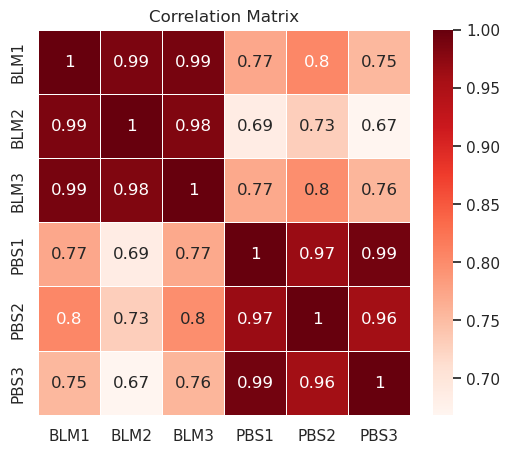

In [8]:
# 设置Seaborn样式
sns.set(style="whitegrid")

# 创建一个更大的图形
plt.figure(figsize=(6, 5))

correlation_matrix = counts_df.T.corr()
# 绘制热图
sns.heatmap(correlation_matrix, annot=True, cmap='Reds', linewidths=0.5)

# 设置标题和标签
plt.title('Correlation Matrix')

# 显示图形
plt.savefig("correlation_matrix.pdf", bbox_inches='tight')


In [17]:
metadata = pd.DataFrame({
    'condition': ['BLM'] * 3 + ['PBS'] * 3,
}, index=counts_df.index)
metadata

,condition
BLM1,BLM
BLM2,BLM
BLM3,BLM
PBS1,PBS
PBS2,PBS
PBS3,PBS


# 2.DESeq2

## 2.1 Build DESeq2 object

In [18]:
inference = DefaultInference(n_cpus=8)
dds = DeseqDataSet(
    counts=counts_df,
    metadata=metadata,
    design_factors="condition",
    refit_cooks=True,
    inference=inference,
    # n_cpus=8, # n_cpus can be specified here or in the inference object
)

## 2.2 vst

In [19]:
dds.vst(use_design=True)
dds

Fitting size factors...
... done in 0.06 seconds.

Fitting dispersions...
... done in 1.11 seconds.

Fitting dispersion trend curve...
... done in 0.29 seconds.



AnnData object with n_obs × n_vars = 6 × 21344
    obs: 'condition'
    uns: 'trend_coeffs', 'disp_function_type'
    obsm: 'design_matrix', 'size_factors'
    varm: 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', '_normed_means', 'fitted_dispersions'
    layers: 'normed_counts', '_mu_hat', 'vst_counts'

In [30]:
normed_counts = pd.DataFrame(dds.layers['normed_counts'], index=dds.obs.index, columns=dds.var.index)
normed_counts_log = np.log2(normed_counts + 1)

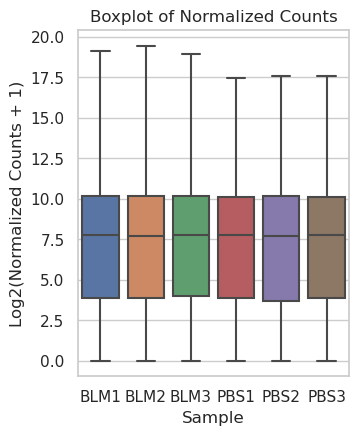

In [40]:

plt.figure(figsize=(3.5, 4.5))
sns.boxplot(data=normed_counts_log.T)
plt.xlabel('Sample')
plt.ylabel('Log2(Normalized Counts + 1)')
plt.title('Boxplot of Normalized Counts')
plt.xticks(rotation=0)
plt.savefig("boxplot.pdf", bbox_inches='tight')


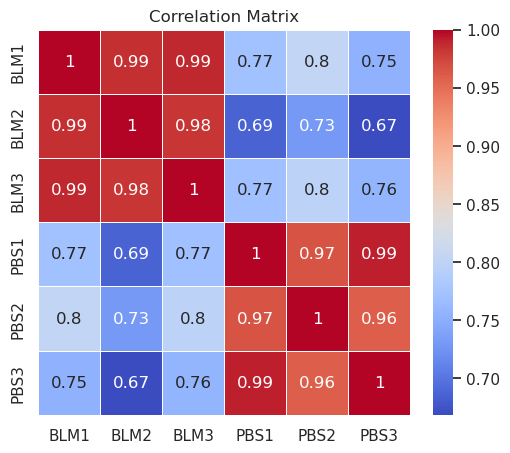

In [42]:
# 设置Seaborn样式
sns.set(style="whitegrid")

# 创建一个更大的图形
plt.figure(figsize=(6, 5))

correlation_matrix = normed_counts.T.corr()
# 绘制热图
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# 设置标题和标签
plt.title('Correlation Matrix')

# 显示图形
plt.savefig("correlation_matrix.pdf", bbox_inches='tight')


In [43]:
data=dds.layers['vst_counts']

## 2.3 PCA

In [44]:
# # construct a dataframe using pandas
# df1=pd.DataFrame(data['data'],columns=data['feature_names'])
 
# # Scale data before applying PCA
# scaling=StandardScaler()
 
# # Use fit and transform method 
# scaling.fit(df1)
# Scaled_data=scaling.transform(df1)
 
# Set the n_components=3
principal=PCA(n_components=3)
principal.fit(data)
x=principal.transform(data)
 
# Check the dimensions of data after PCA
print(x.shape)

(6, 3)


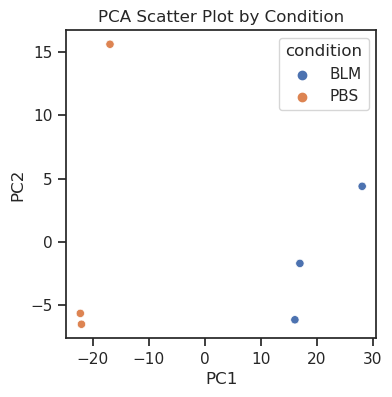

In [48]:

sns.set(style="ticks")
import seaborn as sns
plt.figure(figsize=(4,4))
sns.scatterplot(x = x[:,0], y = x[:,1], hue=metadata['condition'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Scatter Plot by Condition')
plt.savefig("PCA.pdf", bbox_inches='tight')

## 2.4 DESeq2

In [15]:
dds.deseq2()

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 1.00 seconds.

Fitting dispersion trend curve...
... done in 0.26 seconds.

Fitting MAP dispersions...
... done in 1.11 seconds.

Fitting LFCs...
... done in 0.80 seconds.

Replacing 0 outlier genes.



In [16]:
print(dds)

AnnData object with n_obs × n_vars = 6 × 21344
    obs: 'condition'
    uns: 'trend_coeffs', 'disp_function_type', '_squared_logres', 'prior_disp_var'
    obsm: 'design_matrix', 'size_factors', 'replaceable'
    varm: 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', '_normed_means', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced', 'refitted'
    layers: 'normed_counts', '_mu_hat', 'vst_counts', '_mu_LFC', '_hat_diagonals', 'cooks'


In [21]:
del dds.varm,dds.uns

In [22]:
dds.write_h5ad("/home/lzz/rna/data/dds.h5ad")

In [52]:
stat_res = DeseqStats(dds, inference=inference, contrast=["condition", "BLM", "PBS"])

In [53]:
stat_res.summary()

Running Wald tests...


Log2 fold change & Wald test p-value: condition BLM vs PBS
                          baseMean  log2FoldChange     lfcSE      stat  \
ENSMUSG00000000001.4   4081.829916        0.083977  0.085308  0.984400   
ENSMUSG00000000028.15   134.635554        0.160473  0.195160  0.822264   
ENSMUSG00000000031.16    41.267060        1.616352  0.516968  3.126598   
ENSMUSG00000000037.17    12.176036        0.721355  0.638266  1.130179   
ENSMUSG00000000049.11     4.257233        0.470250  1.132811  0.415118   
...                            ...             ...       ...       ...   
ENSMUSG00000118425.1      3.183742       -2.414260  1.645962 -1.466778   
ENSMUSG00000118449.1     14.595959        0.140134  0.561274  0.249671   
ENSMUSG00000118456.1    116.958481       -0.523188  0.199461 -2.623016   
ENSMUSG00000118458.1      1.735343        0.319902  1.734829  0.184400   
ENSMUSG00000118462.1     29.758444       -0.612787  0.397882 -1.540121   

                         pvalue      padj  
ENSMUSG0

... done in 0.65 seconds.



In [54]:
diff = stat_res.results_df
diff.head()

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
ENSMUSG00000000001.4,4081.829916,0.083977,0.085308,0.984400,0.324919,0.544734
ENSMUSG00000000028.15,134.635554,0.160473,0.195160,0.822264,0.410926,0.626292
ENSMUSG00000000031.16,41.267060,1.616352,0.516968,3.126598,0.001768,0.009923
ENSMUSG00000000037.17,12.176036,0.721355,0.638266,1.130179,0.258401,0.472677
ENSMUSG00000000049.11,4.257233,0.470250,1.132811,0.415118,0.678055,NaN


In [55]:
diff.to_csv("../output/diff_blm_pbs.csv", index=True, header=True)

In [56]:
diff = pd.read_csv("../output/diff_blm_pbs.csv", index_col=0)
diff

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
ENSMUSG00000000001.4,4081.829916,0.083977,0.085308,0.984400,0.324919,0.544734
ENSMUSG00000000028.15,134.635554,0.160473,0.195160,0.822264,0.410926,0.626292
ENSMUSG00000000031.16,41.267060,1.616352,0.516968,3.126598,0.001768,0.009923
ENSMUSG00000000037.17,12.176036,0.721355,0.638266,1.130179,0.258401,0.472677
ENSMUSG00000000049.11,4.257233,0.470250,1.132811,0.415118,0.678055,NaN
...,...,...,...,...,...,...
ENSMUSG00000118425.1,3.183742,-2.414260,1.645962,-1.466778,0.142437,NaN
ENSMUSG00000118449.1,14.595959,0.140134,0.561274,0.249671,0.802842,0.903379
ENSMUSG00000118456.1,116.958481,-0.523188,0.199461,-2.623016,0.008716,0.037902
ENSMUSG00000118458.1,1.735343,0.319902,1.734829,0.184400,0.853700,NaN


In [57]:
print(diff.loc[(diff['padj'] < 0.05) & (diff['log2FoldChange'] > 0), :]['log2FoldChange'].min())
print(diff.loc[(diff['padj'] < 0.05) & (diff['log2FoldChange'] < 0), :]['log2FoldChange'].max())


0.1808414448010196
-0.1839548346480778


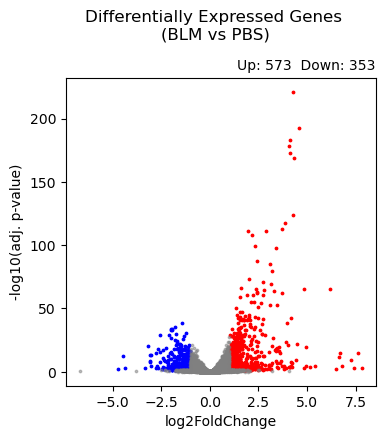

In [63]:
up_index = (diff['log2FoldChange'] > 1 ) & (diff['padj'] < 0.05)
down_index = (diff['log2FoldChange'] < -1 ) & (diff['padj'] < 0.05)
none_index = ~(up_index | down_index)
diff['-log10(adj. p-value)'] = -1 * np.log10(diff['padj'])
plt.figure(figsize=(4, 4))
plt.scatter(diff.loc[up_index, 'log2FoldChange'], diff.loc[up_index, '-log10(adj. p-value)'], c='red', s=3)
plt.scatter(diff.loc[down_index, 'log2FoldChange'], diff.loc[down_index, '-log10(adj. p-value)'], c='blue', s=3)
plt.scatter(diff.loc[none_index, 'log2FoldChange'], diff.loc[none_index, '-log10(adj. p-value)'], c='grey', s=3, alpha=0.5)
plt.xlabel('log2FoldChange')
plt.ylabel('-log10(adj. p-value)')
up_count = up_index.value_counts().iloc[1]
down_count = down_index.value_counts().iloc[1]
plt.title(f'Up: {up_count:.0f}  Down: {down_count:.0f}', loc='right', fontsize=10)
plt.suptitle('Differentially Expressed Genes \n(BLM vs PBS)', x=0.5, y=1.05, fontsize=12)
plt.savefig('../output/Figure1_BLM_vs_PBS_DE.png', dpi=300, bbox_inches='tight')
